In [1]:
! git clone "https://github.com/Ajanth007/Wildlife-Detection-AI-Project-.git"

Cloning into 'Wildlife-Detection-AI-Project-'...


Step 1: Setup YOLOv8 in Google Colab

In [2]:
!pip install ultralytics
!pip install playsound
from IPython import display
display.clear_output()

from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


📁 Step 2: Prepare Dataset
You can either:

✅ Use Roboflow to annotate and export your dataset in YOLOv8 format, OR

✅ Annotate your own dataset using LabelImg and convert it to YOLO format.

🔗 Step 3: Download Dataset from Roboflow (Easiest Method)
Go to Roboflow, annotate and export in YOLOv8 + PyTorch format.

Copy the curl command Roboflow gives you and paste it in Colab:

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NYDi2Vd3cnRTefYstTUo")
project = rf.workspace("roadsidewildlifedetection").project("roadside-wildlife-detection")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Roadside-Wildlife-Detection-1 in yolov8:: 100%|██████████| 1690/1690 [00:00<00:00, 4020.02it/s]


🛠️ Step 4: Train YOLOv8 Model

In [4]:
model = YOLO("yolov8n.yaml")

model.train(
    data="/content/Roadside-Wildlife-Detection-1/data.yaml",
    epochs=30,
    imgsz=640,
    batch=8
)


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Roadside-Wildlife-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,012,018 parameters, 3,012,002 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1420.2±753.4 MB/s, size: 49.7 KB)


train: Scanning /content/Roadside-Wildlife-Detection-1/train/labels... 629 images, 15 backgrounds, 0 corrupt: 100%|██████████| 629/629 [00:00<00:00, 2436.38it/s]

train: New cache created: /content/Roadside-Wildlife-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 506.8±293.0 MB/s, size: 50.9 KB)


val: Scanning /content/Roadside-Wildlife-Detection-1/valid/labels... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 1700.21it/s]

val: New cache created: /content/Roadside-Wildlife-Detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.14G      3.212      4.731      4.201         15        640: 100%|██████████| 79/79 [00:15<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]


                   all        126        202   0.000839      0.239    0.00098   0.000354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.39G       3.18      4.617      4.054         14        640: 100%|██████████| 79/79 [00:13<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]

                   all        126        202    0.00133      0.245    0.00177   0.000557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.42G      3.183      4.492      3.806         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        126        202    0.00317     0.0459    0.00209   0.000523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.44G      3.091      4.369      3.596         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]

                   all        126        202    0.00179      0.358    0.00218   0.000683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.46G      2.958      4.249      3.428          9        640: 100%|██████████| 79/79 [00:12<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]


                   all        126        202      0.682     0.0288    0.00892    0.00252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.47G      2.793      4.081      3.235         17        640: 100%|██████████| 79/79 [00:13<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        126        202      0.355     0.0438     0.0155    0.00389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.49G      2.625      4.003      3.125         16        640: 100%|██████████| 79/79 [00:13<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.21it/s]

                   all        126        202      0.356     0.0331     0.0153    0.00574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       1.5G      2.543      3.853      3.012         13        640: 100%|██████████| 79/79 [00:12<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        126        202      0.548      0.069     0.0386     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.52G       2.44       3.75      2.927         11        640: 100%|██████████| 79/79 [00:12<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]

                   all        126        202       0.27     0.0784     0.0506     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.54G      2.374      3.677      2.844          8        640: 100%|██████████| 79/79 [00:12<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.89it/s]


                   all        126        202      0.195     0.0956     0.0379     0.0126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.56G      2.272      3.567       2.78         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]

                   all        126        202      0.223      0.126     0.0519     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.57G      2.213      3.506      2.693         16        640: 100%|██████████| 79/79 [00:12<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.43it/s]

                   all        126        202      0.287      0.133     0.0433     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.59G      2.159      3.443       2.67         12        640: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.14it/s]

                   all        126        202      0.238      0.121     0.0539     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.61G      2.148      3.399      2.653         22        640: 100%|██████████| 79/79 [00:12<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        126        202      0.244      0.187     0.0635     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.62G      2.089      3.339      2.611         10        640: 100%|██████████| 79/79 [00:12<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        126        202      0.225     0.0933     0.0658     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.63G      2.017      3.266      2.537         18        640: 100%|██████████| 79/79 [00:13<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        126        202      0.247      0.139     0.0692     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.66G      2.088      3.302       2.55         11        640: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        126        202      0.247     0.0904     0.0802     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.68G      1.974      3.171      2.482         11        640: 100%|██████████| 79/79 [00:13<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all        126        202       0.27      0.166     0.0807     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.69G      2.022      3.191      2.491         20        640: 100%|██████████| 79/79 [00:13<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.99it/s]

                   all        126        202     0.0924      0.136     0.0894     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.71G      1.917      3.149      2.409         10        640: 100%|██████████| 79/79 [00:13<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.36it/s]

                   all        126        202      0.247      0.126     0.0749     0.0383


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.73G      1.885      3.281      2.486         10        640: 100%|██████████| 79/79 [00:13<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]

                   all        126        202      0.302       0.15      0.115     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.74G       1.85      3.134      2.453          6        640: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]


                   all        126        202      0.114      0.212      0.105     0.0478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.76G      1.886      3.023       2.44         10        640: 100%|██████████| 79/79 [00:12<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        126        202      0.115      0.207      0.123     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.77G      1.805      2.962      2.403          7        640: 100%|██████████| 79/79 [00:12<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]

                   all        126        202      0.161      0.242      0.134     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.79G      1.809      2.944      2.389          5        640: 100%|██████████| 79/79 [00:12<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.49it/s]

                   all        126        202      0.165      0.214      0.147     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.81G       1.78      2.906      2.367          8        640: 100%|██████████| 79/79 [00:12<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.52it/s]

                   all        126        202      0.151      0.201      0.147     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.83G      1.781      2.817      2.344          4        640: 100%|██████████| 79/79 [00:12<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.71it/s]

                   all        126        202      0.154      0.243      0.162     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.85G      1.734      2.801      2.354          6        640: 100%|██████████| 79/79 [00:12<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        126        202      0.179      0.226      0.167     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.86G      1.721      2.762      2.297          8        640: 100%|██████████| 79/79 [00:12<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.45it/s]

                   all        126        202      0.162      0.223      0.165      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.88G      1.733       2.73      2.283         18        640: 100%|██████████| 79/79 [00:12<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        126        202      0.168      0.247      0.172     0.0944



30 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.10it/s]


                   all        126        202      0.167      0.247      0.173     0.0946
                   cat         18         21      0.127     0.0952      0.059     0.0207
                   cow         20         46       0.19      0.196      0.192     0.0968
                   dog         18         34          0          0     0.0278     0.0114
              elephant         34         45      0.382      0.688      0.456      0.277
                monkey         31         32      0.305        0.5       0.28      0.152
               objects         15         24          0          0     0.0203    0.00975
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d193cbc5890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

📈 Step 5: Evaluate the Model

In [5]:
metrics = model.val()


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1732.3±492.1 MB/s, size: 45.5 KB)


val: Scanning /content/Roadside-Wildlife-Detection-1/valid/labels.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.07it/s]


                   all        126        202      0.168      0.247      0.173     0.0947
                   cat         18         21      0.127     0.0952      0.059     0.0207
                   cow         20         46       0.19      0.196      0.192     0.0968
                   dog         18         34          0          0     0.0277     0.0114
              elephant         34         45      0.383      0.688      0.456      0.277
                monkey         31         32      0.305        0.5      0.281      0.152
               objects         15         24          0          0     0.0216     0.0102
Speed: 1.9ms preprocess, 8.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train2


📷 Step 7: Real-time Webcam Detection in Colab
Colab can only access webcam through JavaScript frontend (one frame at a time). Use this method for basic detection:

🔁 Starting continuous detection loop (stop by manually interrupting the cell)...


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 (no detections), 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 truck, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 car, 1 bus, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 2 cars, 1 bus, 1 truck, 59.3ms
Speed: 6.3ms preprocess, 59.3ms inference, 15.2ms postprocess per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 elephant, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


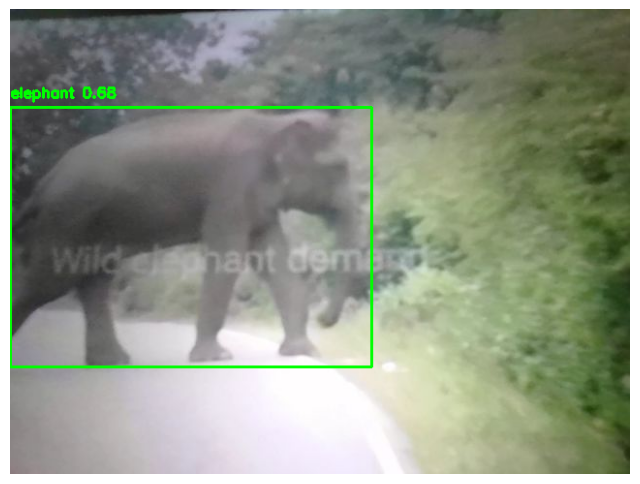

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 elephant, 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


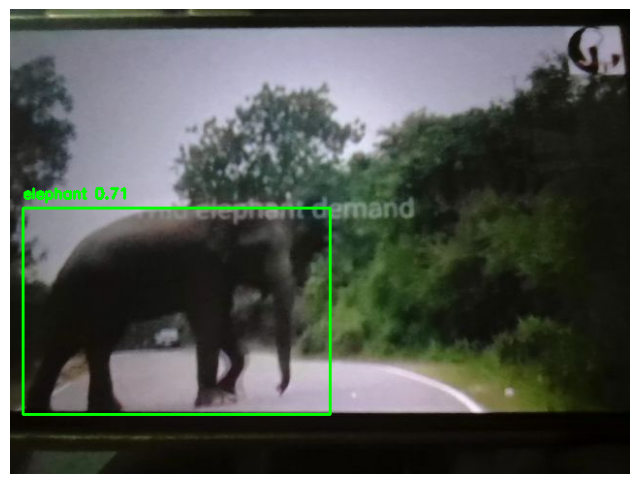

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 elephant, 14.0ms
Speed: 2.1ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


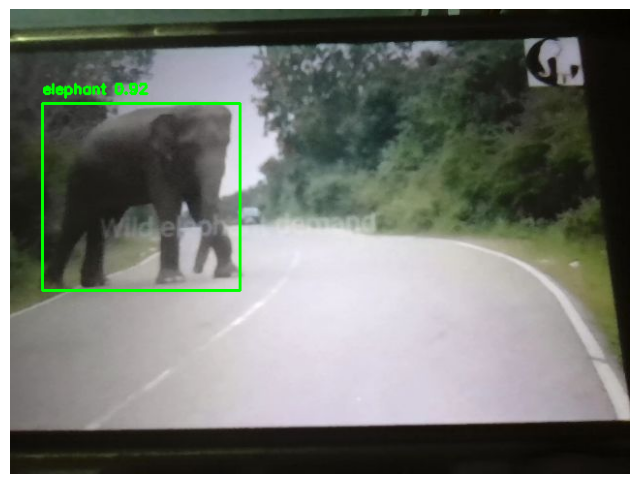

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 (no detections), 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 (no detections), 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 car, 1 truck, 1 elephant, 16.8ms
Speed: 4.2ms preprocess, 16.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


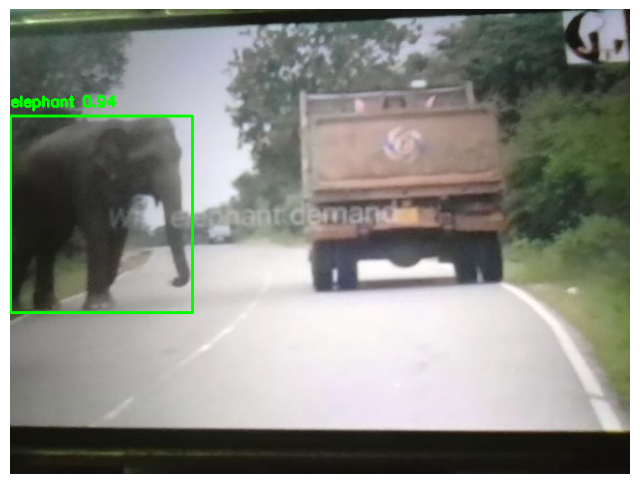

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 truck, 1 elephant, 10.9ms
Speed: 2.3ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


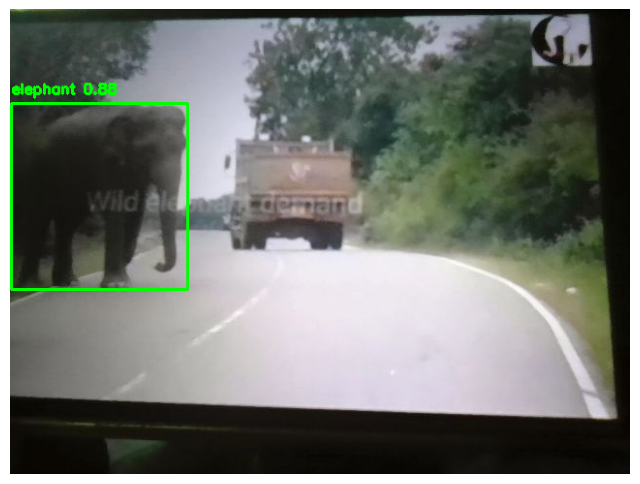

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 elephant, 11.6ms
Speed: 2.3ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


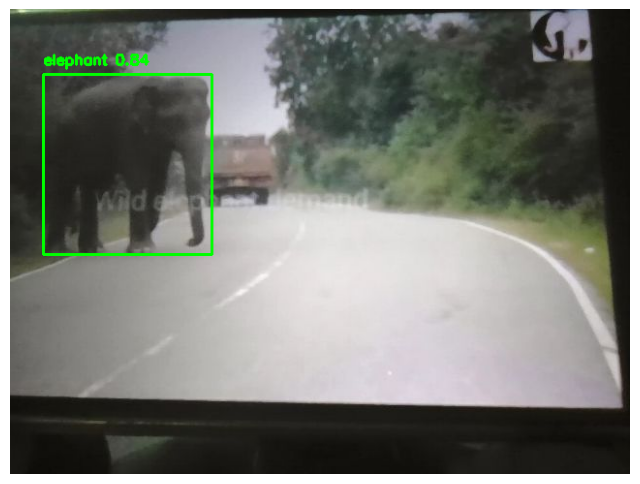

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 elephant, 14.3ms
Speed: 2.3ms preprocess, 14.3ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


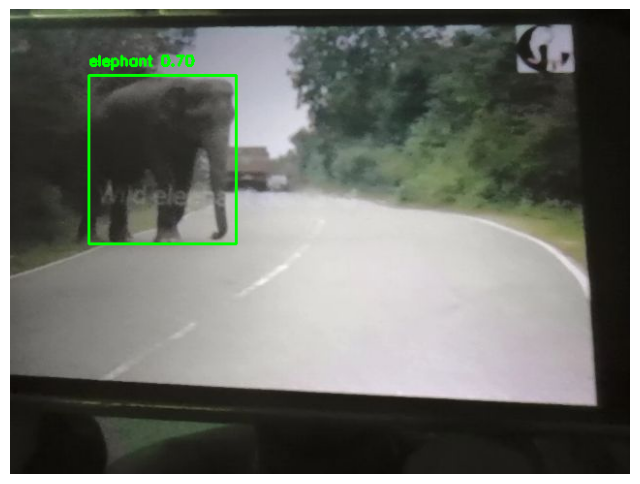

<IPython.core.display.Javascript object>


image 1/1 /content/photo.jpg: 480x640 1 elephant, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


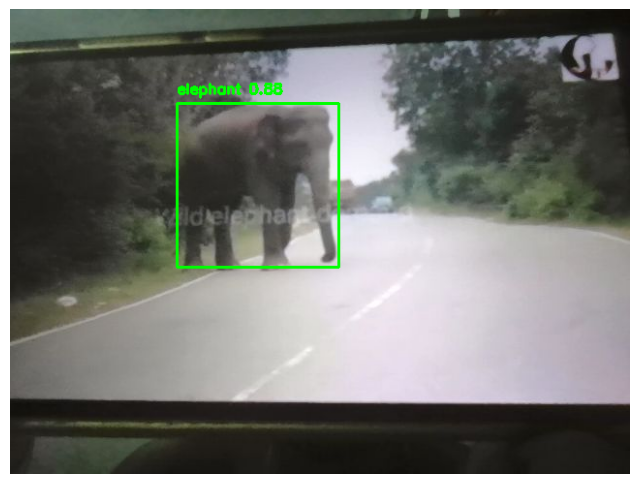

<IPython.core.display.Javascript object>

In [ ]:

# It is intented to make infinite frames

from IPython.display import Audio, display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import time
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Function to capture photo from webcam using JavaScript
def take_photo(filename='photo.jpg', quality=0.8, delay=2000):
    js = Javascript(f'''
        async function takePhoto(quality, delay) {{
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({{video: true}});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise(resolve => setTimeout(resolve, delay));

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }}
        takePhoto({quality}, {delay});
    ''')
    display(js)
    data = eval_js(f"takePhoto({quality}, {delay})")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Load YOLOv8 model (use your custom model if needed)
model = YOLO('yolov8n.pt')

# List of animals to detect
labels_of_interest = ["cat", "dog", "elephant", "monkey"]

print("🔁 Starting continuous detection loop (stop by manually interrupting the cell)...")

# Infinite loop
while True:
    img_path = take_photo()  # Capture image
    results = model.predict(img_path, conf=0.5)  # YOLO prediction

    img = cv2.imread(img_path)
    detected = False  # Flag for detection

    for result in results:
        for box in result.boxes:
            cls = result.names[int(box.cls)]
            if cls in labels_of_interest:
                x1, y1, x2, y2 = box.xyxy[0].int().tolist()
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                label = f'{cls} {box.conf.item():.2f}'
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                            0.5, (0, 255, 0), 2)
                detected = True

    # Show the result if animal is detected
    if detected:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

        # Play alert sound
        try:
            display(Audio("/content/horn.mp3", autoplay=True))
        except FileNotFoundError:
            print("⚠️ Alert sound not found!")

    time.sleep(1)  # Short delay before next capture




